In [1]:
%pip install plotly


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from sklearn.metrics.pairwise import cosine_similarity

In [3]:
path = "skill_builder_data.csv"

data = pd.read_csv(path, encoding = "ISO-8859-15",low_memory=False)

In [24]:
pd.set_option('display.max_columns', 500)
data.head(10)

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,answer_type,sequence_id,student_class_id,position,type,base_sequence_id,skill_id,skill_name,teacher_id,school_id,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,33022537,277618,64525,33139,51424,1,1,1,32454,tutor,algebra,5948,13241,126,MasterySection,5948,1.0,Box and Whisker,22763,73,0,3,32454,30799,NaN,26,0,NaN,1,1.0
1,33022709,277618,64525,33150,51435,1,1,1,4922,tutor,algebra,5948,13241,126,MasterySection,5948,1.0,Box and Whisker,22763,73,0,3,4922,30799,NaN,55,0,NaN,2,2.0
2,35450204,220674,70363,33159,51444,1,0,2,25390,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,3,42000,30799,NaN,88,0,NaN,1,1.0
3,35450295,220674,70363,33110,51395,1,1,1,4859,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,3,4859,30059,NaN,41,0,NaN,2,2.0
4,35450311,220674,70363,33196,51481,1,0,14,19813,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,3,4,124564,30060,NaN,65,0,0.0,3,3.0
5,35450555,220674,70363,33172,51457,1,1,1,16031,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,4,16031,30060,NaN,12,0,NaN,4,4.0
6,35450573,220674,70363,33174,51459,1,1,1,15047,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,4,15047,30060,NaN,6,0,NaN,5,5.0
7,35480603,220674,70363,33123,51408,1,1,1,10732,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,3,10732,30059,NaN,55,0,NaN,6,6.0
8,33140811,220674,70677,33168,51453,1,1,1,23241,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,4,23241,30060,NaN,12,0,NaN,1,1.0
9,33140919,220674,70677,33112,51397,1,1,1,11512,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,2,11512,30059,NaN,36,0,NaN,2,2.0


In [5]:
data.describe()

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,sequence_id,student_class_id,position,base_sequence_id,skill_id,teacher_id,school_id,hint_count,hint_total,overlap_time,template_id,answer_id,first_action,bottom_hint,opportunity,opportunity_original
count,5.255340e+05,525534.000000,525534.000000,525534.000000,525534.000000,525534.000000,525534.000000,525534.000000,5.255340e+05,525534.000000,525534.000000,525534.000000,525534.000000,459208.000000,525534.000000,525534.000000,525534.000000,525534.000000,5.255340e+05,525534.000000,48678.000000,525534.000000,79907.000000,525534.000000,449220.000000
mean,3.161965e+07,275517.199675,82623.435437,47937.082410,84113.537240,0.854788,0.679471,1.502466,4.799217e+04,7314.518764,12870.105498,46.107219,6801.875140,155.697516,47131.211062,3359.889176,0.440900,2.343095,5.958873e+04,39186.973305,147942.999836,0.104265,0.750986,79.017325,79.267542
std,4.941704e+06,10508.585740,6980.075777,12163.903242,25818.833052,0.352315,0.466680,10.579588,3.186983e+05,1415.629335,777.715449,60.586946,1270.141521,127.620640,14048.208437,1874.088471,1.126559,1.647155,3.424129e+05,12186.156526,56691.957500,0.355609,0.432445,271.379609,281.534924
min,2.022408e+07,217900.000000,14.000000,86.000000,83.000000,0.000000,0.000000,0.000000,-7.759575e+06,5870.000000,11644.000000,1.000000,5870.000000,1.000000,11158.000000,1.000000,0.000000,0.000000,-7.759575e+06,86.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,2.842936e+07,268669.000000,78558.000000,38069.000000,61117.000000,1.000000,0.000000,1.000000,7.687000e+03,6057.000000,12351.000000,6.000000,5970.000000,47.000000,42999.000000,2770.000000,0.000000,0.000000,9.904000e+03,30041.000000,104356.000000,0.000000,1.000000,4.000000,4.000000
50%,3.287434e+07,276974.000000,79066.000000,47752.000000,86353.000000,1.000000,1.000000,1.000000,2.079100e+04,7118.000000,12455.000000,18.000000,6272.000000,81.000000,46174.000000,2770.000000,0.000000,3.000000,2.573500e+04,31062.000000,136352.000000,0.000000,1.000000,12.000000,10.000000
75%,3.511790e+07,280999.000000,86415.000000,52325.000000,91659.000000,1.000000,1.000000,1.000000,5.000000e+04,7630.000000,13241.000000,57.000000,7020.000000,297.000000,56898.000000,5056.000000,0.000000,3.000000,6.232300e+04,47130.000000,198111.000000,0.000000,1.000000,46.000000,39.000000
max,3.831020e+07,291503.000000,96299.000000,106210.000000,207348.000000,1.000000,1.000000,3824.000000,8.407692e+07,13362.000000,14415.000000,295.000000,13362.000000,378.000000,69274.000000,9948.000000,10.000000,10.000000,8.407692e+07,106180.000000,323181.000000,2.000000,1.000000,3585.000000,3585.000000


In [6]:
print("The number of records: "+ str(len(data['order_id'].unique())))

The number of records: 346860


In [7]:
print('Part of missing values for every column')
print(data.isnull().sum() / len(data))

Part of missing values for every column
order_id                0.000000
assignment_id           0.000000
user_id                 0.000000
assistment_id           0.000000
problem_id              0.000000
original                0.000000
correct                 0.000000
attempt_count           0.000000
ms_first_response       0.000000
tutor_mode              0.000000
answer_type             0.000000
sequence_id             0.000000
student_class_id        0.000000
position                0.000000
type                    0.000000
base_sequence_id        0.000000
skill_id                0.126207
skill_name              0.149733
teacher_id              0.000000
school_id               0.000000
hint_count              0.000000
hint_total              0.000000
overlap_time            0.000000
template_id             0.000000
answer_id               0.907374
answer_text             0.180358
first_action            0.000000
bottom_hint             0.847951
opportunity             0.000000
opp

In [8]:
len(data.user_id.unique())

4217

In [9]:
!python -m pip install -U kaleido


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [10]:
%pip show nbformat

Name: nbformat
Version: 5.10.4
Summary: The Jupyter Notebook format
Home-page: https://jupyter.org
Author: 
Author-email: Jupyter Development Team <jupyter@googlegroups.com>
License: BSD 3-Clause License
        
        - Copyright (c) 2001-2015, IPython Development Team
        - Copyright (c) 2015-, Jupyter Development Team
        
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        1. Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
        
        2. Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the following disclaimer in the documentation
           and/or other materials provided with the distribution.
        
        3. Neither the name of the copyright holder nor

In [11]:
%pip install --upgrade nbformat


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


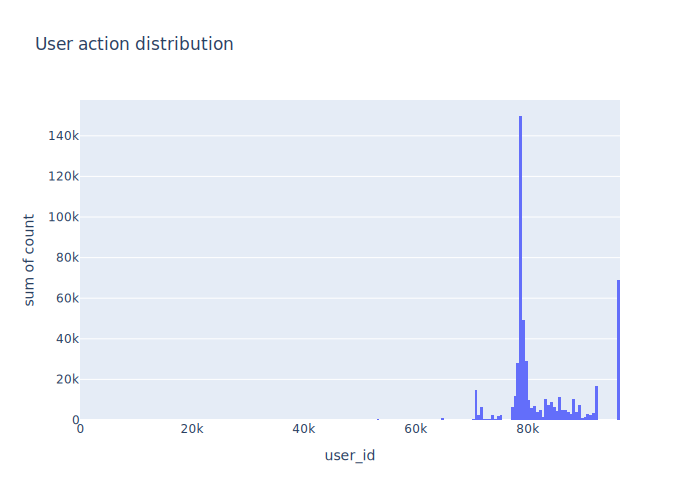

In [12]:
ds = data['user_id'].value_counts().reset_index()

ds.columns = [
    'user_id',
    'count'
]

ds = ds.sort_values('user_id')

fig = px.histogram(
    ds,
    x = 'user_id',
    y = 'count',
    title = 'User action distribution'
)

fig.show("svg")

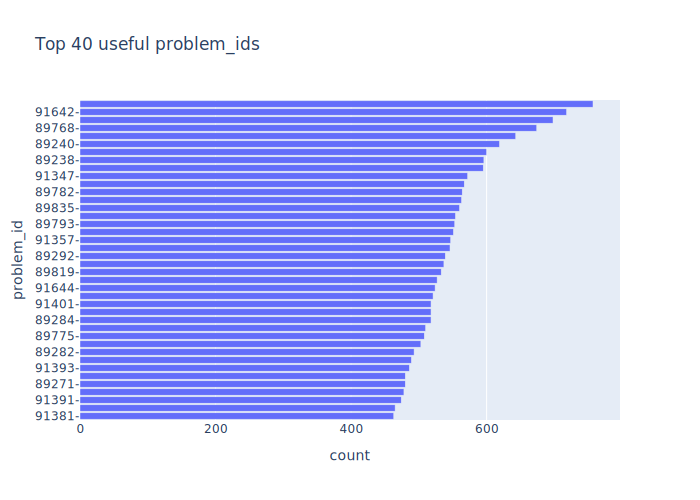

In [13]:
ds = data['problem_id'].value_counts().reset_index()

ds.columns = [
    'problem_id',
    'count'
]

ds['problem_id'] = ds['problem_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'problem_id',
    orientation = 'h',
    title = 'Top 40 useful problem_ids'
)

fig.show("svg")

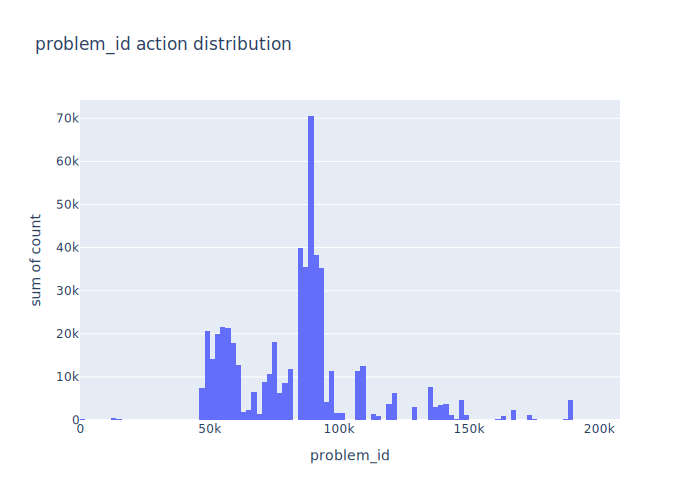

In [14]:
ds = data['problem_id'].value_counts().reset_index()

ds.columns = [
    'problem_id',
    'count'
]

ds = ds.sort_values('problem_id')

fig = px.histogram(
    ds,
    x='problem_id',
    y='count',
    title='problem_id action distribution'
)

fig.show("svg")

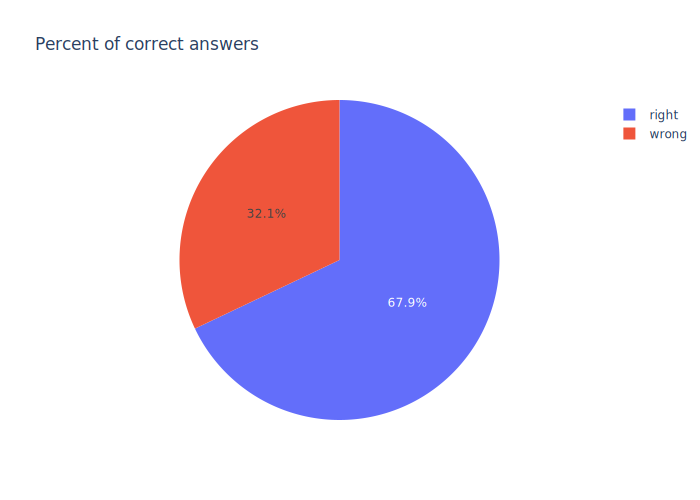

In [15]:
ds = data['correct'].value_counts().reset_index()

ds.columns = [
    'correct',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['percent'])

fig = px.pie(
    ds,
    names = ['wrong', 'right'],
    values = 'percent',
    title = 'Percent of correct answers'
)

fig.show("svg")

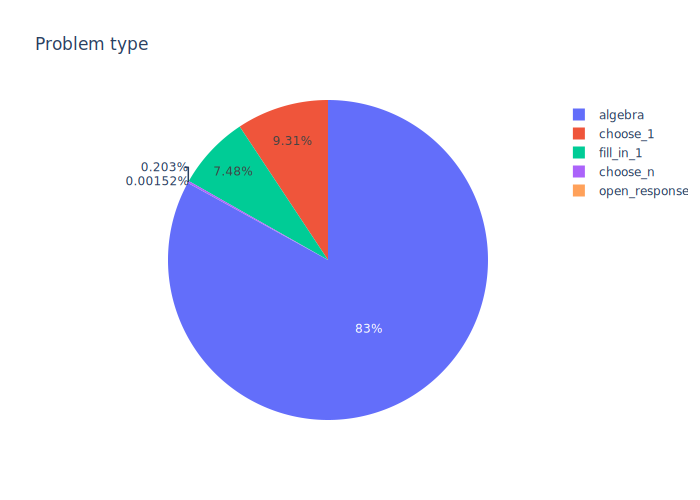

In [16]:
ds = data['answer_type'].value_counts().reset_index()

ds.columns = [
    'answer_type',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['percent'])

fig = px.pie(
    ds,
    names = 'answer_type',
    values = 'percent',
    title = 'Problem type',
)

fig.show("svg")

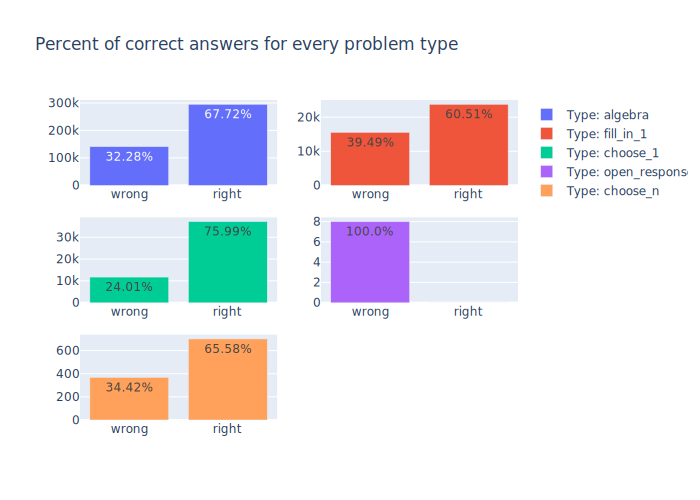

In [17]:
fig = make_subplots(rows=3, cols=2)

traces = [
    go.Bar(
        x = ['wrong', 'right'],
        y = [
            len(data[(data['answer_type'] == item) & (data['correct'] == 0)]),
            len(data[(data['answer_type'] == item) & (data['correct'] == 1)])
        ],
        name = 'Type: ' + str(item),
        text = [
            str(round(100*len(data[(data['answer_type'] == item)&(data['correct'] == 0)])/len(data[data['answer_type'] == item]),2)) + '%',
            str(round(100*len(data[(data['answer_type'] == item)&(data['correct'] == 1)])/len(data[data['answer_type'] == item]),2)) + '%'
        ],
        textposition = 'auto'
    ) for item in data['answer_type'].unique().tolist()
]

for i in range(len(traces)):
    fig.append_trace(
        traces[i],
        (i //2) + 1,
        (i % 2) + 1
    )

fig.update_layout(
    title_text = 'Percent of correct answers for every problem type',
)

fig.show("svg")

In [18]:
len(data['school_id'].unique())

75

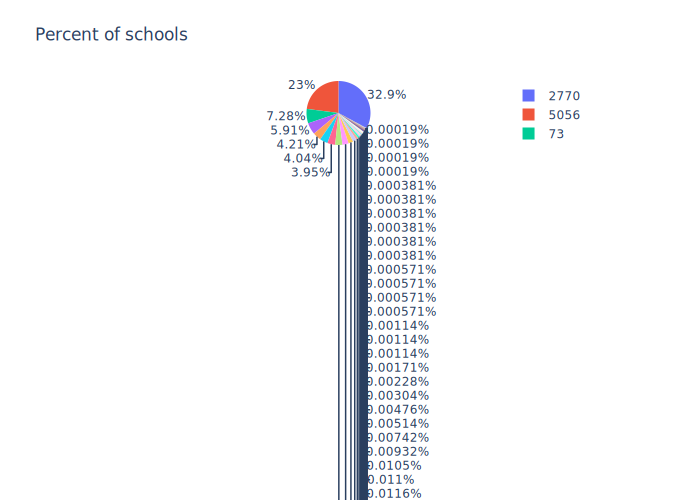

In [19]:
ds = data['school_id'].value_counts().reset_index()

ds.columns = [
    'school_id',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['percent'])

fig = px.pie(
    ds,
    names = 'school_id',
    values = 'percent',
    title = 'Percent of schools',
)

fig.show("svg")

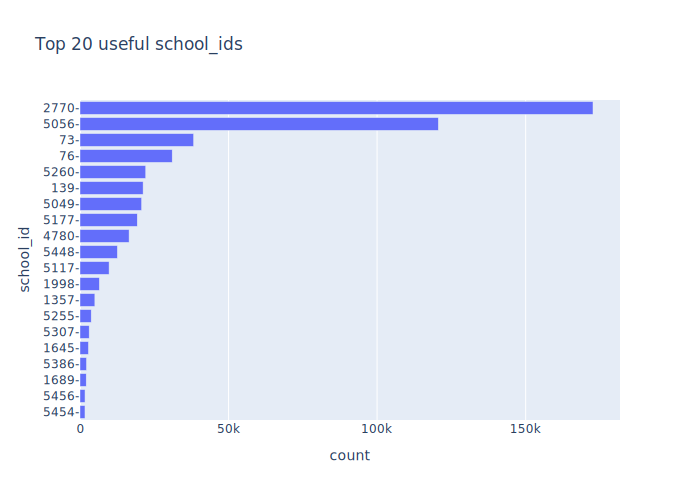

In [20]:
ds = data['school_id'].value_counts().reset_index()

ds.columns = [
    'school_id',
    'count'
]

ds['school_id'] = ds['school_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(20)

fig = px.bar(
    ds,
    x = 'count',
    y = 'school_id',
    orientation = 'h',
    title = 'Top 20 useful school_ids'
)

fig.show("svg")

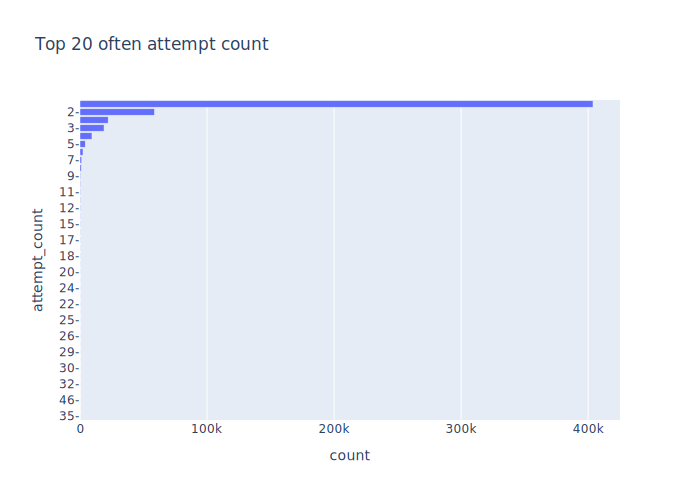

In [21]:
ds = data['attempt_count'].value_counts().reset_index()

ds.columns = [
    'attempt_count',
    'count'
]

ds['attempt_count'] = ds['attempt_count'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'attempt_count',
    orientation = 'h',
    title = 'Top 20 often attempt count'
)

fig.show("svg")

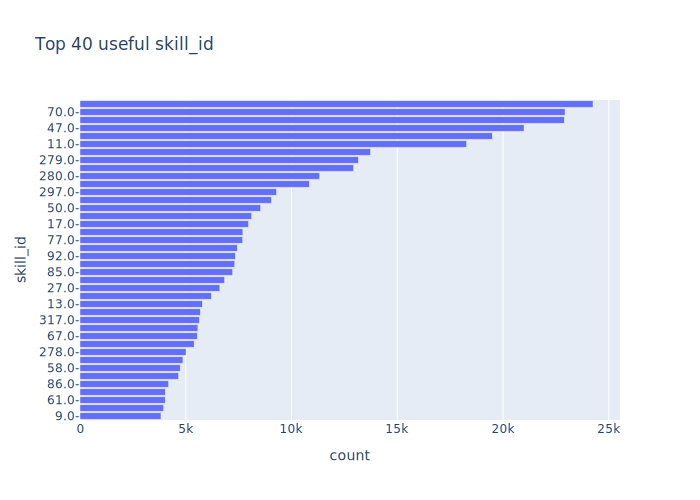

In [22]:
ds = data['skill_id'].dropna() # There are less NaNs in 'skill_id' column than 'skill_name' column.
ds = ds.value_counts().reset_index()

ds.columns = [
    'skill_id',
    'count'
]

ds['skill_id'] = ds['skill_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'skill_id',
    orientation = 'h',
    title = 'Top 40 useful skill_id'
)

fig.show("svg")

In [23]:
print(data.columns.tolist())

['order_id', 'assignment_id', 'user_id', 'assistment_id', 'problem_id', 'original', 'correct', 'attempt_count', 'ms_first_response', 'tutor_mode', 'answer_type', 'sequence_id', 'student_class_id', 'position', 'type', 'base_sequence_id', 'skill_id', 'skill_name', 'teacher_id', 'school_id', 'hint_count', 'hint_total', 'overlap_time', 'template_id', 'answer_id', 'answer_text', 'first_action', 'bottom_hint', 'opportunity', 'opportunity_original']


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

data = pd.read_csv('skill_builder_data.csv', encoding='latin1')

data = data[['user_id', 'problem_id', 'skill_id', 'correct']].dropna()

data['skill_id'] = data['skill_id'].astype(str)

user_skill_matrix = pd.pivot_table(data, 
                                   index='user_id', 
                                   columns='skill_id', 
                                   values='correct', 
                                   aggfunc='mean', 
                                   fill_value=0)

problem_skill_data = data[['problem_id', 'skill_id']].drop_duplicates()
problem_skill_data['count'] = 1  
problem_skill_matrix = pd.pivot_table(problem_skill_data, 
                                      index='problem_id', 
                                      columns='skill_id', 
                                      values='count',  
                                      aggfunc='sum',  
                                      fill_value=0).applymap(lambda x: 1 if x > 0 else 0)

def recommend_problems(user_id, user_skill_matrix, problem_skill_matrix, data, top_n=5):
    done_problems = data[data['user_id'] == user_id]['problem_id'].unique()
    
    if user_id not in user_skill_matrix.index:
        return "User không tồn tại trong dữ liệu"
    user_profile = user_skill_matrix.loc[user_id].values.reshape(1, -1)
    
    similarity_scores = cosine_similarity(user_profile, problem_skill_matrix.values)
    
    problem_indices = np.argsort(similarity_scores[0])[::-1]
    recommended_problems = []
    for idx in problem_indices:
        problem = problem_skill_matrix.index[idx]
        if problem not in done_problems: 
            recommended_problems.append(problem)
        if len(recommended_problems) >= top_n:
            break
    
    return recommended_problems

sample_user = user_skill_matrix.index[0]
recommendations = recommend_problems(sample_user, user_skill_matrix, problem_skill_matrix, data, top_n=5)

print(f"Danh sách problem_id được gợi ý cho user {sample_user}:")
print(recommendations)

print("\nThông tin chi tiết của các bài tập gợi ý:")
recommended_details = data[data['problem_id'].isin(recommendations)][['problem_id', 'skill_id']].drop_duplicates()
print(recommended_details)

/tmp/ipykernel_13176/3005786903.py:6: DtypeWarning:

Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.



Danh sách problem_id được gợi ý cho user 14:
[np.int64(92394), np.int64(92393), np.int64(92392), np.int64(92391), np.int64(92389)]

Thông tin chi tiết của các bài tập gợi ý:
       problem_id skill_id
55430       92393     15.0
55495       92394     15.0
55533       92392     15.0
55877       92391     15.0
56095       92389     15.0


/tmp/ipykernel_13176/3005786903.py:31: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

